In [1]:
import pandas as pd

In [2]:
item_categories = pd.read_csv("input/item_categories.csv")
items = pd.read_csv("input/items.csv")
sales_train = pd.read_csv("input/sales_train.csv")
#sample_submission = pd.read_csv("input/sample_submission.csv")
shops = pd.read_csv("input/shops.csv")
test = pd.read_csv("input/test.csv")

In [3]:
#不要な情報 item_category
#item_categories
#shopデータの確認 →不要と判断
#shops
#サンプルデータの確認
#sample_submission

In [5]:
#item_nameは不要なので削除
category = items[["item_id","item_category_id"]]

In [6]:
#カテゴリデータを追加
train = pd.merge(sales_train,category,on="item_id",how="left")

In [8]:
#create Time Seriese
train["year"] = train["date"].str[6:]
train["month"] = train["date"].str[3:5]
train["day"] = train["date"].str[0:2]
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day
0,02.01.2013,0,59,22154,999.00,1.0,37,2013,01,02
1,03.01.2013,0,25,2552,899.00,1.0,58,2013,01,03
2,05.01.2013,0,25,2552,899.00,-1.0,58,2013,01,05
3,06.01.2013,0,25,2554,1709.05,1.0,58,2013,01,06
4,15.01.2013,0,25,2555,1099.00,1.0,56,2013,01,15
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,55,2015,10,10
2935845,09.10.2015,33,25,7460,299.00,1.0,55,2015,10,09
2935846,14.10.2015,33,25,7459,349.00,1.0,55,2015,10,14
2935847,22.10.2015,33,25,7440,299.00,1.0,57,2015,10,22


In [56]:
#create Time Seriese for test data
test["year"] = "2015"
test["month"] = "11"
test["date_block_num"] = "34"

count    2.935847e+06
mean     1.241903e+00
std      2.292963e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+03
Name: item_cnt_day, dtype: float64

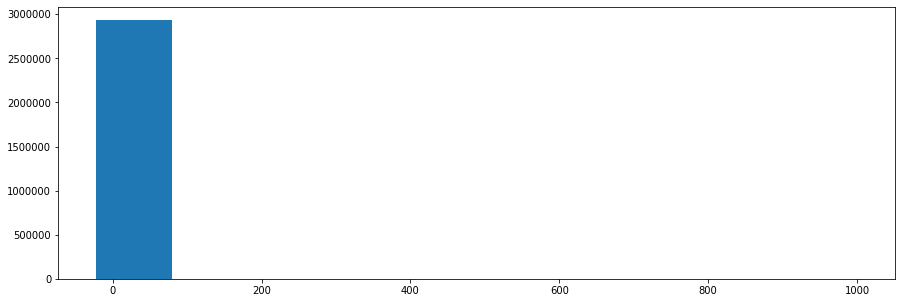

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
#複数のヒストグラム作成
#購入回数()
fig = plt.figure(figsize=(15,5))
plt.hist(train["item_cnt_day"])
train["item_cnt_day"].describe()

(array([455.,  38.,  10.,   5.,   8.,   2.,   3.,   0.,   0.,   1.]),
 array([  51. ,  145.9,  240.8,  335.7,  430.6,  525.5,  620.4,  715.3,
         810.2,  905.1, 1000. ]),
 <a list of 10 Patch objects>)

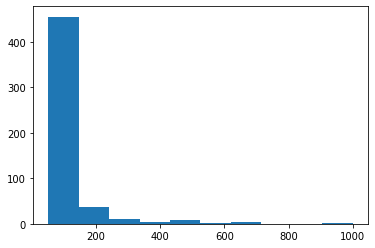

In [62]:
train_too_much = train.loc[train["item_cnt_day"] > 50]
plt.hist(train_too_much["item_cnt_day"])

In [10]:
#priceの確認
check_price_item_shop = train.groupby(["item_id","shop_id"],as_index=False).mean()

In [11]:
train.sort_values("item_cnt_day")
train = train.loc[train["item_cnt_day"] <1001]
train = train.loc[train["item_price"] > 0]

In [12]:
#ショップ＆商品ID&月？によって価格が異なるようなので、ショップ＆商品で直近の価格をテストデータの価格とする
#※あとでまた考える必要はあり　→本来は翌月の価格を予測すべき？
check_price_item_shop

,item_id,shop_id,date_block_num,item_price,item_cnt_day,item_category_id
0,0,54,20.0,58.0,1.0,40.0
1,1,55,18.0,4490.0,1.0,76.0
2,2,54,20.5,58.0,1.0,40.0
3,3,54,18.5,79.0,1.0,40.0
4,4,54,20.0,58.0,1.0,40.0
...,...,...,...,...,...,...
424119,22168,12,4.0,799.0,1.0,62.0
424120,22168,16,1.0,799.0,1.0,62.0
424121,22168,42,1.0,799.0,1.0,62.0
424122,22168,43,2.0,798.5,1.0,62.0


In [13]:
test = pd.merge(test,category,on="item_id",how="left")

In [14]:
test

,ID,shop_id,item_id,year,month,item_category_id
0,0,5,5037,2015,11,19
1,1,5,5320,2015,11,55
2,2,5,5233,2015,11,19
3,3,5,5232,2015,11,23
4,4,5,5268,2015,11,20
...,...,...,...,...,...,...
214195,214195,45,18454,2015,11,55
214196,214196,45,16188,2015,11,64
214197,214197,45,15757,2015,11,55
214198,214198,45,19648,2015,11,40


In [15]:
train_month = train.groupby(["year","month","shop_id","item_id"],as_index=False).sum()
train_month = train_month[["year","month","shop_id","item_id","item_cnt_day"]]
train_month = pd.merge(train_month,check_price_item_shop[["item_id","shop_id","item_price","item_category_id"]],on=["item_id","shop_id"],how="left")

In [16]:
train_month.sort_values("item_price",ascending=True)

,year,month,shop_id,item_id,item_cnt_day,item_price,item_category_id
349659,2013,06,58,11865,4.0,0.090000,63.0
350264,2013,06,58,20146,6.0,0.095833,63.0
413311,2013,08,6,11864,2.0,0.096667,63.0
354833,2013,07,6,11864,3.0,0.096667,63.0
298592,2013,06,6,11864,7.0,0.096667,63.0
...,...,...,...,...,...,...,...
1578300,2015,10,3,13403,1.0,42990.000000,16.0
1587523,2015,10,22,13403,1.0,42990.000000,16.0
1260641,2015,01,12,7241,1.0,49782.000000,75.0
804390,2014,03,25,13199,1.0,50999.000000,69.0


In [17]:
#本当はshopごとの価格をつけた方が良いけどとりあえず
#item_price_mean = train.groupby(["item_id","shop_id"],as_index=False).mean()
item_price_mean = train.groupby("item_id",as_index=False).mean()
test = pd.merge(test,item_price_mean[["item_id","item_price"]],on="item_id",how="left")

In [18]:
#とりあえず
test["item_price"] = test["item_price"].fillna(100)

In [19]:
test_month = test[["year","month","shop_id","item_id","item_price","item_category_id"]]

In [20]:
train_month

,year,month,shop_id,item_id,item_cnt_day,item_price,item_category_id
0,2013,01,0,32,6.0,221.000000,40.0
1,2013,01,0,33,3.0,347.000000,37.0
2,2013,01,0,35,1.0,247.000000,40.0
3,2013,01,0,43,1.0,221.000000,40.0
4,2013,01,0,51,2.0,127.750000,57.0
...,...,...,...,...,...,...,...
1609119,2015,10,59,22087,6.0,87.571429,83.0
1609120,2015,10,59,22088,2.0,89.375940,83.0
1609121,2015,10,59,22091,1.0,126.586207,83.0
1609122,2015,10,59,22100,1.0,629.000000,42.0


In [21]:
train_y = train_month["item_cnt_day"]

In [22]:
del train_month["item_cnt_day"]

In [23]:
train_month["year"] = train_month["year"].astype(int)
train_month["month"] = train_month["month"].astype(int)

test_month["year"] = test_month["year"].astype(int)
test_month["month"] = test_month["month"].astype(int)

/Users/hayashiryuutarou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/hayashiryuutarou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_month,train_y)
dtest = xgb.DMatrix(test_month)

In [25]:
params = {"objective":"reg:squarederror","silent":1,"random_state":71}
num_round = 70

In [26]:
model = xgb.train(params,dtrain,num_round)

In [27]:
pred = model.predict(dtest)

In [54]:
#予測結果
pred.max()

416.60837

In [33]:
test_month

,year,month,shop_id,item_id,item_price,item_category_id
0,2015,11,5,5037,1926.828388,19
1,2015,11,5,5320,100.000000,55
2,2015,11,5,5233,800.777500,19
3,2015,11,5,5232,790.512923,23
4,2015,11,5,5268,100.000000,20
...,...,...,...,...,...,...
214195,2015,11,45,18454,188.681084,55
214196,2015,11,45,16188,1256.975000,64
214197,2015,11,45,15757,198.113208,55
214198,2015,11,45,19648,98.096296,40


In [50]:
test_month["item_cnt_month"] = test_month["year"]
for i in range(len(test_month["year"])):
    test_month["item_cnt_month"].iloc[i] = pred[i]

In [52]:
result = test_month["item_cnt_month"]

In [53]:
result.to_csv("submission.csv",index=True)